In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('kyphosis.csv')

In [4]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


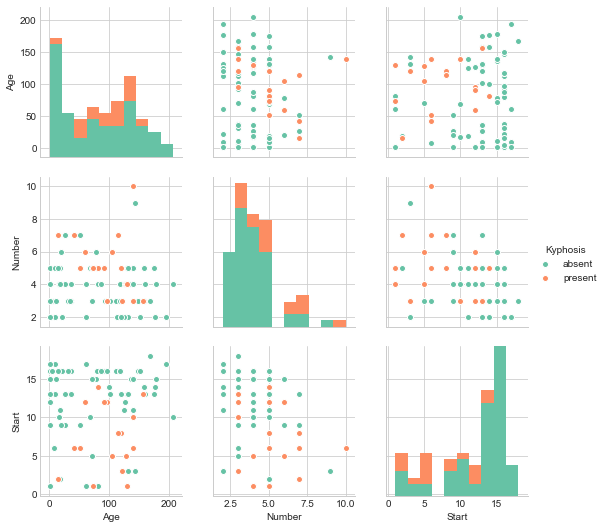

In [105]:
sns.set_style('whitegrid')
sns.pairplot(df, hue= 'Kyphosis',palette='Set2')

In [8]:
df.corr()

,Age,Number,Start
Age,1.000000,-0.016687,0.057828
Number,-0.016687,1.000000,-0.425099
Start,0.057828,-0.425099,1.000000


In [18]:
from sklearn.model_selection import train_test_split

In [63]:
x = df.drop('Kyphosis',axis = 1)
y = df['Kyphosis']
test_size = 0.30
seed = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
dtree = DecisionTreeClassifier()

# Import k-fold and cross_val_score and grid searchCV from model_selection

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### Kfold cross validation without gridsearch

In [67]:
kfold = KFold(n_splits = 5, random_state = seed)
results = cross_val_score(dtree,x_train, y_train, cv=kfold,scoring ='accuracy')

In [68]:
print(' ACCURACY => Mean: {} & SD:{}'.format(results.mean().round(3),results.std().round(3)))

 ACCURACY => Mean: 0.767 & SD:0.075


### Kfold cross validation with gridsearch to find optimum parameters

In [69]:
tree_grid = range(1,4)
param_grid = dict(max_features= tree_grid)
grid = GridSearchCV(dtree,param_grid=param_grid,cv=kfold,scoring='accuracy',n_jobs= -1,verbose=1)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    3.7s finished


In [44]:
print(grid_result)
print('\n')
print('Best Accuracy Score: {}'.format(grid.best_score_))
print('\n')
print('Optimum Parameter: Maximum Features = {}'.format(grid.best_estimator_.max_features))
print('\n')
print('CV Results: {}'.format(grid.cv_results_))

GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=False),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_features': range(1, 4)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=1)


Best Accuracy Score: 0.75


Optimum Parameter: Maximum Features = 3


CV Results: {'mean_fit_time': array([0.00352464, 0.00624952, 0.        ]), 'std_fit_time': array([0.00609958, 0.00765407, 0.        ]), 'mean_score_time': array([0.00020008, 0.        , 0.        ]), 'std_score_time': array([0.00040016, 0.        , 0.        ])

In [75]:
# Taking maximum feature=3 as optimum parameter
dree = DecisionTreeClassifier(max_features=3)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [72]:
y_hat = dtree.predict(x_test)

In [73]:
from sklearn.metrics import classification_report, confusion_matrix

In [106]:
print(classification_report(y_test,y_hat))
print('\n')
print(confusion_matrix(y_test,y_hat))

             precision    recall  f1-score   support

     absent       0.80      0.84      0.82        19
    present       0.40      0.33      0.36         6

avg / total       0.70      0.72      0.71        25



[[16  3]
 [ 4  2]]


# Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rfc = RandomForestClassifier(n_estimators=200)

### Kfold cross validation without gridsearch

In [80]:
kfold = KFold(n_splits = 5, random_state = seed)
results = cross_val_score(rfc,x_train, y_train, cv=kfold,scoring ='accuracy')

In [82]:
print(' ACCURACY => Mean: {} & SD:{}'.format(results.mean().round(3),results.std().round(3)))

 ACCURACY => Mean: 0.803 & SD:0.107


### Kfold cross validation with gridsearch to find optimum parameters

In [88]:
estimator_grid = range(1,400)
param_grid = dict(n_estimators= estimator_grid)
grid = GridSearchCV(rfc,param_grid=param_grid,cv=kfold,scoring='accuracy',n_jobs= -1,verbose=1)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 399 candidates, totalling 1995 fits


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 587 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 929 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1279 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1729 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1995 out of 1995 | elapsed:  5.1min finished


In [89]:
print(grid_result)
print('\n')
print('Best Accuracy Score: {}'.format(grid.best_score_))
print('\n')
print('Optimum Parameter: n_estimators = {}'.format(grid.best_estimator_.n_estimators))
print('\n')
print('CV Results: {}'.format(grid.cv_results_))

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=False),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': range(1, 400)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=1)


Best Accuracy Score: 0.8571428571428571


Optimum Parameter: n_estimators = 104


CV Results: {'mean_fit_time': array([0.0070477 , 0.00937529, 0.00624981, 0.01249919, 0.01562452,
       0.01562457, 0.01874962, 0.01874933, 0.02812467, 0.03124905,
       0.031

### n_estimators = 104 is the optimum parameter

In [96]:
rfc_opt = RandomForestClassifier(n_estimators = 104)
rfc_opt.fit(x_train,y_train)
y_hat_rfc = rfc_opt.predict(x_test)

In [97]:
print(classification_report(y_test,y_hat_rfc))
print('\n')
print(confusion_matrix(y_test,y_hat_rfc))

             precision    recall  f1-score   support

     absent       0.79      1.00      0.88        19
    present       1.00      0.17      0.29         6

avg / total       0.84      0.80      0.74        25



[[19  0]
 [ 5  1]]
